## Customer Churn Prediction for TELECOM Company
#### Lots of companies face the issue of losing their customers, so as a part of customer retention program we need to predict customer churn before they decide to leave.<br/>In order to do that we would use this dataset and create a Classification model to predict that whether a customer would churn or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)
df1=pd.read_csv('Telco-Customer-Churn.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### We have 7043 records with 21 different features including customer id and churn

In [2]:
df1.shape

(7043, 21)

#### Most of the columns are object type, but for developing model we need numeric values and some label encoding as well, so now we will change datatype of some columns and change string values to numeric values by encoding them.

In [3]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df1[col]=df1[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df1)

df1['SeniorCitizen']=df1['SeniorCitizen'].astype(bool)
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'],errors='coerce')

In [5]:
df1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


#### There are some categorical values which can be encoded as numbers, so we will take a look at unique values present as categories and convert these fields as category and encode them.

In [6]:
print("Payment methods: ",df1.PaymentMethod.unique())
print("Contract types: ",df1.Contract.unique())
print("Gender: ",df1.gender.unique())
print("Senior Citizen: ",df1.SeniorCitizen.unique())
print("Internet Service Types: ",df1.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [7]:
df1['gender']=df1['gender'].astype('category')
df1['PaymentMethod']=df1['PaymentMethod'].astype('category')
df1['Contract']=df1['Contract'].astype('category')
df1['SeniorCitizen']=df1['SeniorCitizen'].astype('category')
df1['InternetService']=df1['InternetService'].astype('category')
df1.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
df = df1
le_encoder = LabelEncoder()
df['gender_new']=le_encoder.fit_transform(df['gender'])
df['PaymentMethod_new']=le_encoder.fit_transform(df['PaymentMethod'])
df['Contract_new']=le_encoder.fit_transform(df['Contract'])
df['SeniorCitizen_new']=le_encoder.fit_transform(df['SeniorCitizen'])
df['InternetService_new']=le_encoder.fit_transform(df['InternetService'])
df = df1.drop(['gender','Contract','PaymentMethod','SeniorCitizen','InternetService'],axis='columns')
print(df.head())
print(df1.head())
#df['PaymentMethod']=df['PaymentMethod'].astype('category')
#df['Contract']=df['Contract'].astype('category')
#df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
#df['InternetService']=df['InternetService'].astype('category')


   customerID Partner Dependents  tenure PhoneService MultipleLines  \
0  7590-VHVEG       1          0       1            0             0   
1  5575-GNVDE       0          0      34            1             0   
2  3668-QPYBK       0          0       2            1             0   
3  7795-CFOCW       0          0      45            0             0   
4  9237-HQITU       0          0       2            1             0   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0              0            1                0           0           0   
1              1            0                1           0           0   
2              1            1                0           0           0   
3              1            0                1           1           0   
4              0            0                0           0           0   

  StreamingMovies PaperlessBilling  MonthlyCharges  TotalCharges Churn  \
0               0                1           29.85    

In [9]:
#df.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

#df = pd.concat([df, dfPaymentDummies], axis=1)
#df = pd.concat([df, dfContractDummies], axis=1)
#df = pd.concat([df, dfGenderDummies], axis=1)
#df = pd.concat([df, dfSeniorCitizenDummies], axis=1)
#df = pd.concat([df, dfInternetServiceDummies], axis=1)
df.head(2)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_new,PaymentMethod_new,Contract_new,SeniorCitizen_new,InternetService_new
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,2,0,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,3,1,0,0


#### For a bit of simplicity, we'll rename some column names

In [9]:
#df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
 #      'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
  #     'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
   #    'MonthlyCharges', 'TotalCharges', 'Churn',
    #   'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
     #  'payment_Electronic_check', 'payment_Mailed_check',
      # 'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       #'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       #'IS_Fiber_optic', 'IS_No']
df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','MonthlyCharges', 'TotalCharges', 'Churn','gender_new','PaymentMethod_new','Contract_new','SeniorCitizen_new','InternetService_new']

#### We'll convert all fields to number type in dataframe for our model.
#### Here we are wrapping up data preparation phase.

In [10]:
#numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
#       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
#       'MonthlyCharges', 'TotalCharges', 'Churn',
#       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
 #      'payment_Electronic_check', 'payment_Mailed_check',
  #     'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
   #    'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
    #   'IS_Fiber_optic', 'IS_No'])
numericColumns = np.array(['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','MonthlyCharges', 'TotalCharges', 'Churn','gender_new','PaymentMethod_new','Contract_new','SeniorCitizen_new','InternetService_new'])
for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
df.dtypes

customerID             float64
Partner                  int64
Dependents               int64
tenure                   int64
PhoneService             int64
MultipleLines            int64
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
PaperlessBilling         int64
MonthlyCharges         float64
TotalCharges           float64
Churn                    int64
gender_new               int32
PaymentMethod_new        int32
Contract_new             int32
SeniorCitizen_new        int32
InternetService_new      int32
dtype: object

#### We'll save our model data to new csv file without customerID, as we won't be using that in our model development.

In [11]:
modelData = df.loc[:, df.columns != 'customerID']
modelData.to_csv('modelData.csv')

In [12]:
# check for null values
modelData.isnull().sum()

Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
MonthlyCharges          0
TotalCharges           11
Churn                   0
gender_new              0
PaymentMethod_new       0
Contract_new            0
SeniorCitizen_new       0
InternetService_new     0
dtype: int64

### <b>Model Development</b>
#### After reading our model data, we'll take our training and target data in numpy arrays

In [15]:
modelData=pd.read_csv('modelData.csv')

modelData[modelData==np.inf]=np.nan
modelData.fillna(modelData.mean(), inplace=True)

x=np.asarray(modelData.loc[:,modelData.columns != 'Churn'])
y=np.asarray(modelData['Churn'])

print(x[:2])
print(y[:2])

[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 2.9850e+01 2.9850e+01 0.0000e+00 2.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 3.4000e+01 1.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 5.6950e+01 1.8895e+03 1.0000e+00 3.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00]]
[0 0]


#### Here we'll normalize our data by using sklearn's StandardScaler

In [16]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:2]

array([[-1.7318049 ,  1.03453023, -0.65401193, -1.27744458, -3.05401039,
        -0.85417615, -0.63393298,  1.3782406 , -0.72396752, -0.63943864,
        -0.79013171, -0.79607014,  0.8297975 , -1.16032292, -0.99497138,
        -1.00955867,  0.39855772, -0.8282069 , -0.43991649, -1.18323364],
       [-1.73131305, -0.96662231, -0.65401193,  0.06632742,  0.32743831,
        -0.85417615,  1.57745383, -0.72556272,  1.38127743, -0.63943864,
        -0.79013171, -0.79607014, -1.20511329, -0.25962894, -0.17387565,
         0.99053183,  1.33486261,  0.37127103, -0.43991649, -1.18323364]])

#### It is recommended practice of splitting data in training and testing before using it in model, in our case we are keeping 80/20 data for training and testing respectively.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=72)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 20) (5634,)
Test set: (1409, 20) (1409,)


#### Before fitting data to our model, feature selection is very essential part of model development.
#### Here we are using sklearn's RandomForestClassifier with ensemble learning to choose most relevent features for our model. It will iteratively select most relevent features and eliminate least relevent features and threshold will be median for feature selection.

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=37), threshold='median')
select.fit(X_train, y_train)

X_train_s = select.transform(X_train)

print('The shape of x_train: ',X_train.shape)
print('The shape of x_train_s: ',X_train_s.shape)

The shape of x_train:  (5634, 20)
The shape of x_train_s:  (5634, 10)


#### As we can see in above feature selection process, we got 10 most relevent features out of 20 from our training data.
#### We can see here black colored area shows all those features are relevent and selected.

Text(0.5, 0, 'Index of features')

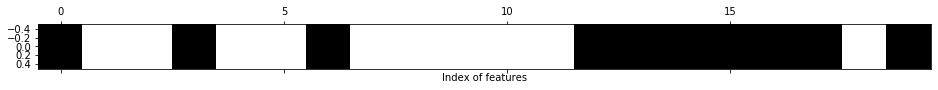

In [22]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of features')

#### We're fitting our training data to LogicalRegression and making prediction on our test data.
#### Accuracy of our model is around 79%, and that means 79/100 times we can make correct prediction.

In [24]:
X_test_s = select.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
score = lr.fit(X_train,y_train).score(X_test, y_test)
print('The score of Logistic Regerssion for customer churn: {:.3f}'.format(score))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score of Logistic Regerssion for customer churn: 0.799


In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
score1_dt = dt.fit(X_train,y_train).score(X_test, y_test)
score2_dt = dt.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of Decision tree classifier for customer churn: {:.3f}'.format(score1_dt))
print('The score of Decision tree classifier(with feature selection) for customer churn: {:.3f}'.format(score2_dt))

The score of Decision tree classifier for customer churn: 0.713
The score of Decision tree classifier(with feature selection) for customer churn: 0.711


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
score1_knn = dt.fit(X_train,y_train).score(X_test, y_test)
score2_knn = dt.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of Decision tree classifier for customer churn: {:.3f}'.format(score1_knn))
print('The score of Decision tree classifier(with feature selection) for customer churn: {:.3f}'.format(score2_knn))

The score of Decision tree classifier for customer churn: 0.727
The score of Decision tree classifier(with feature selection) for customer churn: 0.712


In [28]:
from sklearn.svm import SVC
svm = SVC()
score1_svm = dt.fit(X_train,y_train).score(X_test, y_test)
score2_svm = dt.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of Decision tree classifier for customer churn: {:.3f}'.format(score1_svm))
print('The score of Decision tree classifier(with feature selection) for customer churn: {:.3f}'.format(score2_svm))

The score of Decision tree classifier for customer churn: 0.715
The score of Decision tree classifier(with feature selection) for customer churn: 0.712
